21


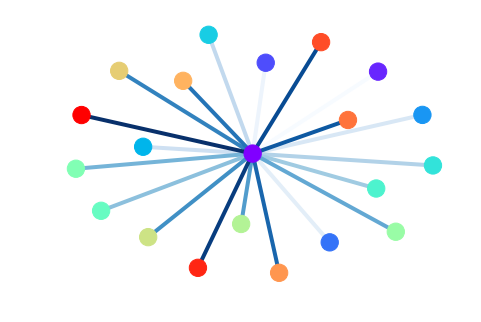

20


In [88]:
import matplotlib.pyplot as plt
import networkx as nx

import matplotlib.pyplot as plt
import networkx as nx
"""
cmap을 넘길 때도 node의 경우는 그냥 cmap으로 넘어가고 
edge의 경우는 edge_cmap 을 넘김. 

color에 차이를 두고 싶을 때는 그냥 range(21)로 서로 다른 값이라는 것만 구분하게 두고, cmap으로 일괄적으로 적용하는 것이 더 좋을 수도 있음. 

"""

G = nx.star_graph(20)
pos = nx.spring_layout(G)
print(len(G.nodes()))
nx.draw(G, pos, node_color=range(21), cmap = plt.cm.rainbow, edge_color=range(20),
        width=4, edge_cmap=plt.cm.Blues, with_labels=False)
plt.show()
print(len(range(20)))

In [248]:
import numpy as np 
    
g = nx.complete_graph(15)
G = nx.Graph()
G.add_nodes_from([("node{}".format(n[0]), {'weight':np.random.randint(1, 100)}) for n in g.nodes(data=True)])
G.add_edges_from(
    ("node{}".format(e[0]), "node{}".format(e[1]), {'weight':np.random.randint(1, 100)}) for e in g.edges(data=True)
)
removed_edges = filter(lambda e: True if e[2]['weight'] > 20 else False, G.edges(data=True))
G.remove_edges_from(list(map(lambda e: (e[0], e[1]), removed_edges)))

"""
그냥 cmap으로 하는게 훨씬 편하네...괜히 고생한듯
근데 또 weight는 느낌이 다르니까...음 그냥 굵게 한 다음에 하면 되는것 같을것 가틱도 하고 
"""

import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

def draw_whole_graph(inputG, outPicFile):
    plt.figure(figsize=(16, 8))
    plt.margins(x=0.1, y=0.02)
    # 아래 layout 중에서 마음에 드는 것을 쓰면 됩니다. 
    pos = nx.spring_layout(G)
    pos = graphviz_layout(G, prog='twopi', args='')
    pos = nx.circular_layout(G)

    nx.draw_networkx_nodes(
        G, pos, node_color=[n[1]['weight'] for n in G.nodes(data=True)], node_shape='h',
        node_size=3000, cmap=plt.cm.Blues, alpha=0.9
                      )
    nx.draw_networkx_edges(
        G, pos, edge_color=[e[2]['weight'] for e in G.edges(data=True)],
        width=5, edge_cmap=plt.cm.Greys, style='dashed'
    )
    nx.draw_networkx_labels(
        G, pos, font_family='sans-serif', font_color='black', font_size=10, font_weight='bold'
    )
    plt.axis('off')
    #plt.show()
    plt.savefig('../../assets/images/markdown_img/'+outPicFile)

draw_whole_graph(G, 'draw_better_1805101529.svg')

"""
node_shape: maplotlit.markers 를 사용하여 그려졌다. 
https://matplotlib.org/api/markers_api.html
"""


'\nnode_shape: maplotlit.markers 를 사용하여 그려졌다. \nhttps://matplotlib.org/api/markers_api.html\n'

In [320]:
def new_complete_g(n):
    g = nx.complete_graph(n)
    G = nx.Graph()
    G.add_nodes_from([("node{}".format(n[0]), {'weight':np.random.randint(1, 100)}) for n in g.nodes(data=True)])
    G.add_edges_from(
        ("node{}".format(e[0]), "node{}".format(e[1]), {'weight':np.random.randint(1, 100)}) for e in g.edges(data=True)
    )
    return G

import matplotlib.pyplot as plt
import networkx as nx

def draw_G_lst(G_lst, outPicName):# 4개라고 생각하자 우선 
    """
    fig size를 length에 따라서 가변적으로 변하게 세팅하면 좋을 것 같은데. 이건 좀 어려울 수 있음
    figsize에 따라서 아래의 node_size나 다른 값들도 바뀌기 때문에, 이걸 바꾸면 모두 연동해서 바뀌도록 해야함. 쓸모없는 짓이라고 생각됨. 
    """
    plt.figure(figsize=(25, 5))
    pos = nx.circular_layout(G_lst[0])
    for i in range(0, len(G_lst)):
        this_subp = plt.subplot("{}{}{}".format(1, len(G_lst), i))
        this_subp.margins(x=0.1, y=0.1)
        nx.draw_networkx_nodes(G_lst[i], pos, node_color='Red', node_shape='h', node_size=2000)
        nx.draw_networkx_edges(G_lst[i], pos, width=10, 
                               edge_color=[e[2]['weight'] for e in G_lst[i].edges(data=True)],
                               edge_cmap=plt.cm.Greys, style='dashed')
        nx.draw_networkx_labels(G_lst[i], pos, 
                               font_family='sans-serif', font_color='black', font_size=12, font_weight='normal')
        plt.axis('off')
    plt.savefig('../../assets/images/markdown_img/'+outPicName)
    #plt.show()
g_lst = [new_complete_g(4) for i in range(0, 5)]
draw_G_lst(g_lst, 'test_draw_graph_lst_1805101611.svg')

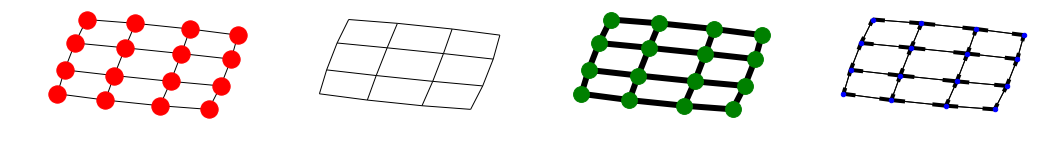

In [254]:
"""
여기서 만약, pos는 똑같이 박아두고 연도별로 어떻게 변하는지를 보고싶다면? 
특정 연도별로 어떻게 변하는지를 보고 싶으면, subplot을 넣어서 아래처럼 해줄 수 있음. 
"""
import matplotlib.pyplot as plt
import networkx as nx

G = nx.grid_2d_graph(4, 4)  # 4x4 grid

pos = nx.spring_layout(G, iterations=100)

plt.figure(figsize=(18, 2))
plt.subplot(141)
nx.draw(G, pos, font_size=8)

plt.subplot(142)
nx.draw(G, pos, node_color='k', node_size=0, with_labels=False)

plt.subplot(143)
nx.draw(G, pos, node_color='g', node_size=250, with_labels=False, width=6)

plt.subplot(144)
H = G.to_directed()
nx.draw(H, pos, node_color='b', node_size=20, arrowstyle='->', with_labels=False)

plt.show()

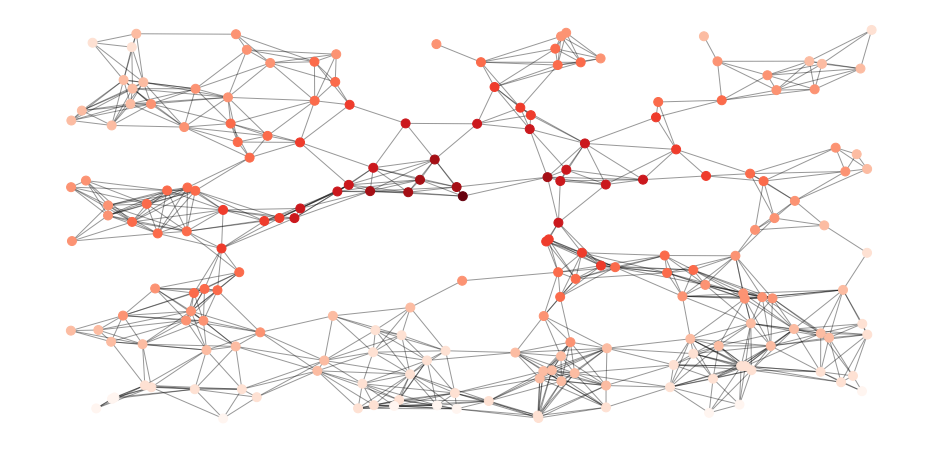

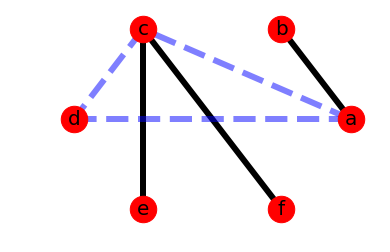

In [199]:
# Author: Aric Hagberg (hagberg@lanl.gov)
"""
- 여기서는 그냥 
"""
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)  # positions for all nodes
pos = nx.circular_layout(G)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=6)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=6, alpha=0.5, edge_color='b', style='dashed')

# labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

plt.axis('off')
plt.show()